In [360]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import ipywidgets as widgets
import math
from random import randint


Estimating the equation for Bernoulli Density

In [424]:
def flip_coins(n):
    return sum([randint(0,1) for x in range(n)])

def roll_dice_values(sides,n):
    return [randint(1,sides) for x in range(n)]

def roll_dice(sides,n):
    return sum([randint(1,sides) for x in range(n)])

#Table at: https://wizardofodds.com/gambling/dice/2/
def calculate_number_combinations(expected_value, number_dice, number_sides=6):
    if(number_dice is 1):
        if 0 < expected_value <= number_sides:
            return 1
        else:
            return 0
    else:
        return sum([calculate_number_combinations(x,number_dice-1, number_sides) for x in range(expected_value-number_sides, expected_value)])

def calculate_dice_liklyhood(expected_value, number_dice, number_sides=6):
    return calculate_number_combinations(expected_value, number_dice, number_sides)/number_sides**number_dice
    
def calculate_bernoulli_density(p,x0,x1,n):
    density = 0
    for x_prime in range(x0, x1+1):
        binomial_coefficient = math.factorial(n)/(math.factorial(x_prime)*math.factorial(n-x_prime))
        density_= binomial_coefficient * p**x_prime*(1-p)**(n-x_prime)
        density += density_
    return density
calculate_bernoulli_density(.5,4,6,10)
calculate_dice_liklyhood(8,2)

#comb(12 with 3 dice)=comb(11 with 2 dice)+comb(10 with 2 dice)+comb(9 with 2 dice)+comb(8 with 2 dice)+comb(7 with 2 dice)+comb(6 with 2 dice),

0.1388888888888889

In [174]:
experiment_count_slide = widgets.IntSlider(
         description='# exp',
         value=100,
         min=50,
         max=1000)
number_flips_slide = widgets.IntSlider(
         description='# of flips',
         value=10,
         min=10,
         max=250)
range_slide = widgets.IntRangeSlider(
    value=[5, 7],
    min=1,
    max=250,
    step=1,
    description='Test:',
    continuous_update=False,
    readout=True,
    readout_format='d',
)

use_slider_inputs = widgets.Checkbox(
    value=False,
    description='Use values set by these sliders',
    disabled=False,
)

box = widgets.VBox([experiment_count_slide, number_flips_slide, range_slide, use_slider_inputs])
box

# What is the likelyhood of flipping x number of heads between y and z given n flips? 

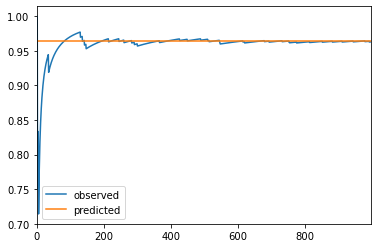

In [317]:
experiment_count = 1000
number_flips = 100
expected_range = [40,60]

if use_slider_inputs.value:
    experiment_count = experiment_count_slide.value
    number_flips=number_flips_slide.value
    expected_range = list(range_slide.value)
    
    
results = []
bernoulli = pd.DataFrame(columns = ['observed', 'predicted'])

#Simulate experiments
for n in range(experiment_count):
    flips = flip_coins(number_flips)
    result = int(expected_range[0]<=flips<=expected_range[1])
    results.append(result)
    observed = sum(results)/(n+1)
    bernoulli = bernoulli.append({'observed':observed}, ignore_index = True)

#Calculate Predicted value
bernoulli['predicted'] = calculate_bernoulli_density(.5,expected_range[0],expected_range[1],number_flips)

ax = plt.gca()
bernoulli.plot(kind='line', y='observed', ax=ax)
bernoulli.plot(kind='line', y='predicted', ax=ax)

# What is the Likelyhood of rolling the sum between y and z given n dice with s sides. 

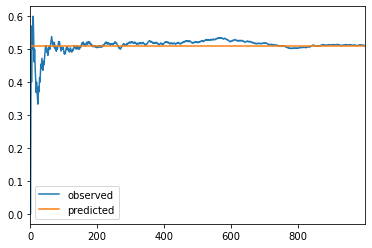

In [471]:
experiment_count = 1000
number_dice = 5
number_sides = 10
expected_range = [20,30] #[5,6] resolves to 5

results = []
bernoulli = pd.DataFrame(columns = ['observed', 'predicted'])

for n in range(experiment_count):
    die_value = roll_dice(number_sides, number_dice)
    result = int(expected_range[0]<=die_value<expected_range[1])
    results.append(result)
    observed = sum(results)/(n+1)
    bernoulli = bernoulli.append({'observed':observed}, ignore_index = True)


bernoulli['predicted'] = sum([calculate_dice_liklyhood(x,number_dice, number_sides) for x in range(expected_range[0],expected_range[1])])



ax = plt.gca()
bernoulli.plot(kind='line', y='observed', ax=ax)
bernoulli.plot(kind='line', y='predicted', ax=ax)

# If I roll a s sided dice n times what is the liklyhood x will occur n times

0.41666666666666674


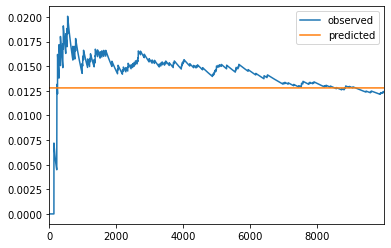

In [473]:
experiment_count = 10000
number_rolls = 10
number_sides = 10
expected_value = 6
expected_occurances = [4,8]

results = []
bernoulli = pd.DataFrame(columns = ['observed', 'predicted'])

for n in range(experiment_count):
    die_value = roll_dice_values(number_sides, number_rolls)
    observed_occurances = die_value.count(expected_value)
    result = int(expected_occurances[0]<=observed_occurances<=expected_occurances[1])
    results.append(result)
    observed = sum(results)/(n+1)
    bernoulli = bernoulli.append({'observed':observed}, ignore_index = True)


bernoulli['predicted'] = calculate_bernoulli_density(1/number_sides,expected_occurances[0],expected_occurances[1],number_rolls)

#x  = 
print(x)
ax = plt.gca()
bernoulli.plot(kind='line', y='observed', ax=ax)
bernoulli.plot(kind='line', y='predicted', ax=ax)